In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import os, cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D ,Dropout

In [ ]:
import pandas as pd
data = pd.read_csv('hmnist_28_28_RGB.csv')

In [ ]:
y = data['label']
x = data.drop(columns = ['label'])

In [ ]:
tabular_data = pd.read_csv('HAM10000_metadata.csv')
tabular_data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [ ]:
tabular_data.shape

(10015, 7)

In [ ]:
classes = {4: ('nv', ' melanocytic nevi'), 6: ('mel', 'melanoma'),
           2 :('bkl', 'benign keratosis-like lesions'), 1:('bcc' , ' basal cell carcinoma'),
           5: ('vasc', ' pyogenic granulomas and hemorrhage'), 0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),  3: ('df', 'dermatofibroma')}

Text(0.5, 1.0, 'Distribution ')

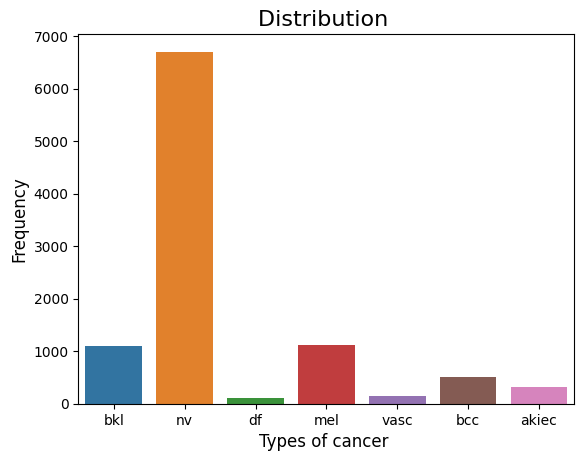

In [ ]:
sns.countplot(x = 'dx', data = tabular_data)
plt.xlabel('Types of cancer ', size=12)
plt.ylabel('Frequency', size=12)
plt.title('Distribution ', size=16)

Text(0.5, 1.0, 'Gender of paitents')

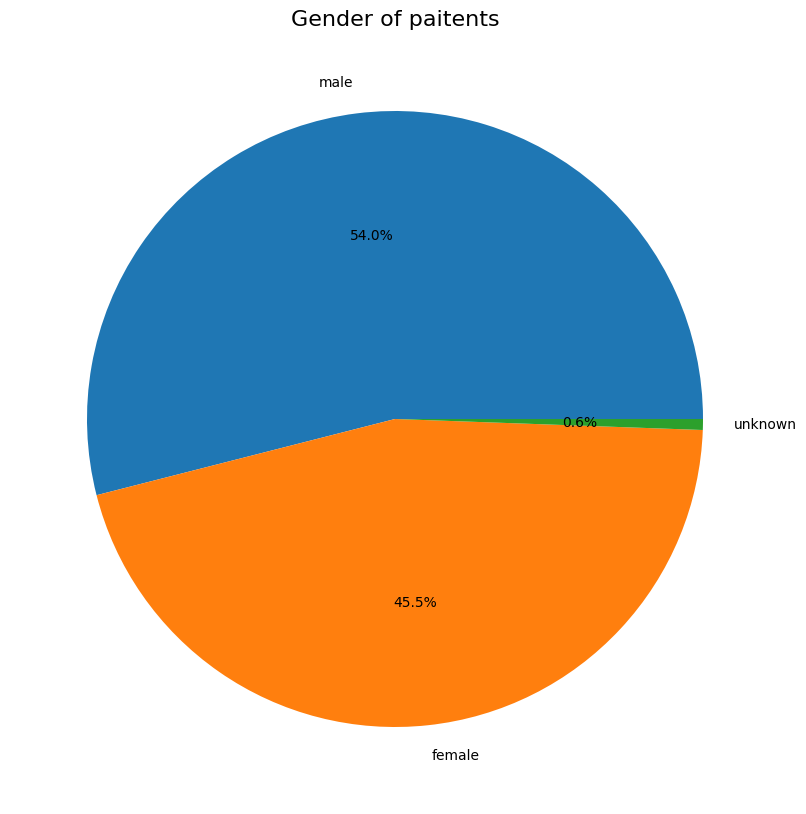

In [ ]:
bar, ax = plt.subplots(figsize = (10,10))
plt.pie(tabular_data['sex'].value_counts(), labels = tabular_data['sex'].value_counts().index, autopct="%.1f%%")
plt.title('Gender of paitents', size=16)

In [ ]:
tabular_data['localization'].value_counts().to_frame()


,localization
back,2192
lower extremity,2077
trunk,1404
upper extremity,1118
abdomen,1022
face,745
chest,407
foot,319
unknown,234
neck,168


In [ ]:
tabular_data['dx'].value_counts()

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'back'),
  Text(1, 0, 'lower extremity'),
  Text(2, 0, 'trunk'),
  Text(3, 0, 'upper extremity'),
  Text(4, 0, 'abdomen'),
  Text(5, 0, 'face'),
  Text(6, 0, 'chest'),
  Text(7, 0, 'foot'),
  Text(8, 0, 'scalp'),
  Text(9, 0, 'neck'),
  Text(10, 0, 'unknown'),
  Text(11, 0, 'hand'),
  Text(12, 0, 'genital'),
  Text(13, 0, 'ear'),
  Text(14, 0, 'acral')])

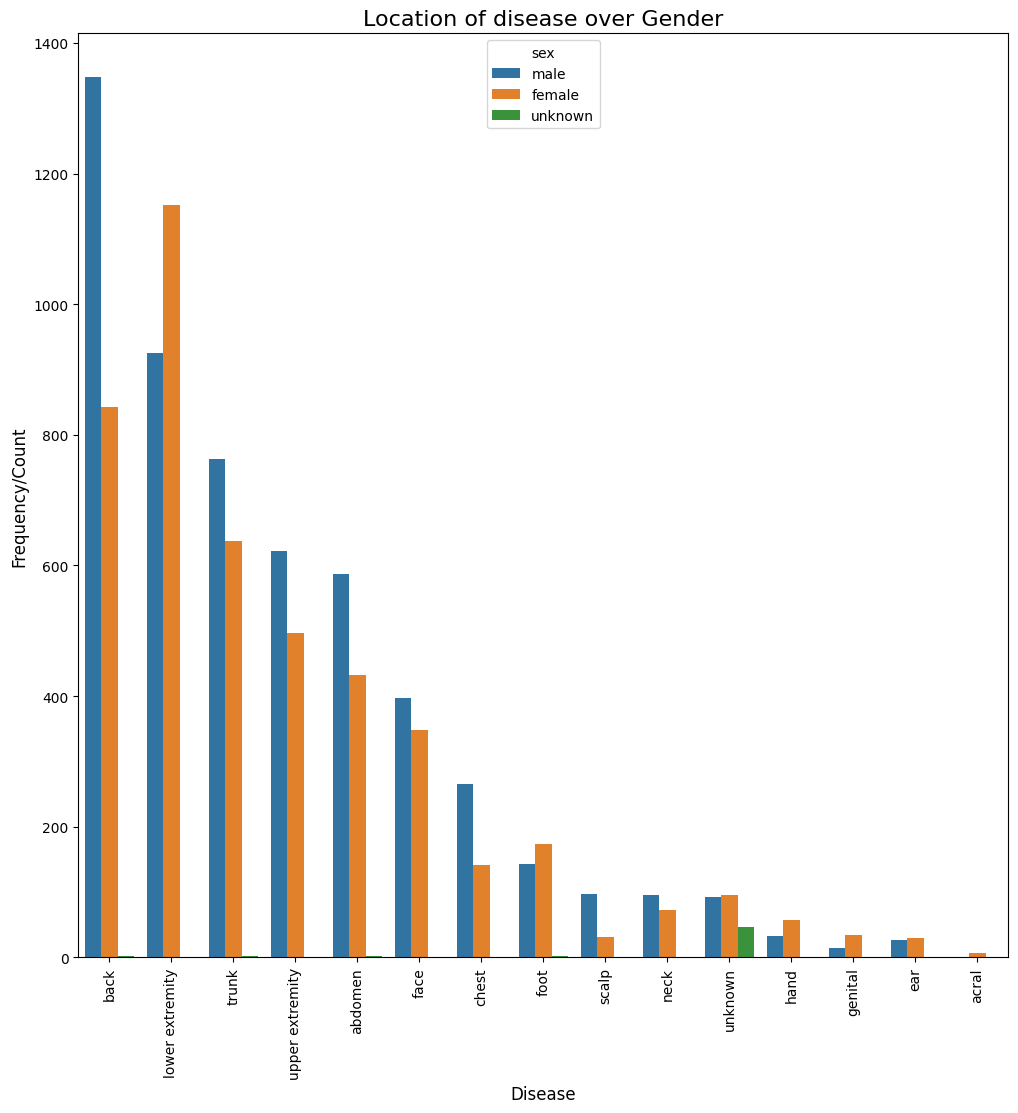

In [ ]:
value = tabular_data[['localization', 'sex']].value_counts().to_frame()
value.reset_index(level=[1,0 ], inplace=True)
temp = value.rename(columns = {'localization':'location', 0: 'count'})

bar, ax = plt.subplots(figsize = (12, 12))
sns.barplot(x = 'location',  y='count', hue = 'sex', data = temp)
plt.title('Location of disease over Gender', size = 16)
plt.xlabel('Disease', size=12)
plt.ylabel('Frequency/Count', size=12)
plt.xticks(rotation = 90)

In [ ]:
x = np.array(x).reshape(-1,28,28,3)
print('Shape of X :',x.shape)

Shape of X : (10015, 28, 28, 3)


In [ ]:
x = (x-np.mean(x))/np.std(x)
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2, random_state=1)
Y_train

1074    2
3588    4
8385    4
2205    6
2441    5
       ..
2895    1
7813    4
905     2
5192    4
235     2
Name: label, Length: 8012, dtype: int64

In [ ]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3), input_shape=(28, 28, 3), activation='relu', padding='same'))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.5))  # Added dropout layer

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.5))  # Added dropout layer

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))  # Added dropout layer
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.4))  # Added dropout layer
model.add(Dense(7, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 16)        448       
                                                                 
 conv2d_7 (Conv2D)           (None, 26, 26, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 64)        18496     
                                                      

In [ ]:
callback = tf.keras.callbacks.ModelCheckpoint(filepath='my_model6.h5',
                                                  monitor='val_acc', mode='max',
                                                 verbose=1)

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, AUC
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.metrics import (
    SparseCategoricalAccuracy,
    SparseTopKCategoricalAccuracy,
    SparseCategoricalCrossentropy,
)
num_classes = 7  # Replace this with the number of classes in your dataset
optimizer = Adam(learning_rate=0.001)

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=optimizer,
    metrics=["accuracy"],
)

history = model.fit(
    X_train,
    Y_train,
    validation_split=0.20,
    batch_size=64,
    epochs=50,
    callbacks=[callback],
)

Epoch 1/50
100/101 [============================>.] - ETA: 0s - loss: 1.2404 - accuracy: 0.6116
Epoch 1: saving model to my_model6.h5
101/101 [==============================] - 20s 181ms/step - loss: 1.2396 - accuracy: 0.6118 - val_loss: 1.0070 - val_accuracy: 0.6769
Epoch 2/50
101/101 [==============================] - ETA: 0s - loss: 1.0144 - accuracy: 0.6623
Epoch 2: saving model to my_model6.h5
101/101 [==============================] - 20s 198ms/step - loss: 1.0144 - accuracy: 0.6623 - val_loss: 0.9330 - val_accuracy: 0.6769
Epoch 3/50
100/101 [============================>.] - ETA: 0s - loss: 0.9615 - accuracy: 0.6661
Epoch 3: saving model to my_model6.h5
101/101 [==============================] - 18s 177ms/step - loss: 0.9621 - accuracy: 0.6659 - val_loss: 0.9058 - val_accuracy: 0.6769
Epoch 4/50
100/101 [============================>.] - ETA: 0s - loss: 0.9175 - accuracy: 0.6716
Epoch 4: saving model to my_model6.h5
101/101 [==============================] - 17s 171ms/step - lo

In [ ]:
import numpy as np
from sklearn.metrics import (
    classification_report,
    precision_recall_fscore_support,
    roc_auc_score,
)

# Get the predictions for the test set
Y_pred_probs = model.predict(X_test)
Y_pred_labels = np.argmax(Y_pred_probs, axis=1)

# Calculate precision, recall, and F1-score
precision, recall, _, _ = precision_recall_fscore_support(Y_test, Y_pred_labels, average="macro")

# Calculate the AUC (macro-average)
roc_auc = roc_auc_score(Y_test, Y_pred_probs, multi_class="ovr", average="macro")

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("AUC:", roc_auc)

# Optional: Print the detailed classification report
print(classification_report(Y_test, Y_pred_labels))

63/63 [==============================] - 2s 27ms/step
Precision: 0.5249981772345108
Recall: 0.46298765748809567
AUC: 0.9156392846478167
              precision    recall  f1-score   support

           0       0.41      0.43      0.42        61
           1       0.52      0.58      0.55        96
           2       0.51      0.41      0.46       228
           3       0.00      0.00      0.00        37
           4       0.84      0.95      0.89      1327
           5       0.82      0.56      0.67        32
           6       0.57      0.31      0.40       222

    accuracy                           0.76      2003
   macro avg       0.52      0.46      0.48      2003
weighted avg       0.73      0.76      0.74      2003



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif